In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import `DBSOD`

In [2]:
from dbsod import dbsod

Prepare data and parameters for `DBSOD`

In [3]:
DATA = np.array(
    [
        [0.35, 0.18],
        [0.60, 0.16],
        [0.40, 0.18],
        [0.40, 0.30],
        [0.30, 0.70],
    ]
)
EPS_SPACE = [0.15, 0.22]
MIN_PTS = 2

Calculate outlierness score for each data point

In [4]:
outlierness_scores = dbsod(
    X=DATA,
    eps_space=EPS_SPACE,
    min_pts=MIN_PTS,
    metric='euclidean'
)
outlierness_scores

Computing pairwise distances:                  [====================] 100% (0 it/s)           
Identifying outliers for each `epsilon` value: [====================] 100% (0 it/s)           


array([0. , 0.5, 0. , 0. , 1. ])

Visualize result

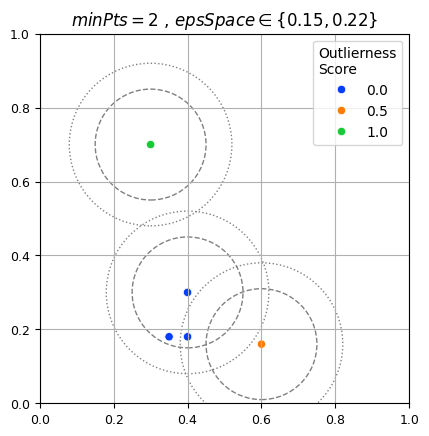

In [5]:
# draw scatter
fig, ax = plt.subplots()
sns.scatterplot(
    x=[x for x, y in DATA],
    y=[y for x, y in DATA],
    hue=outlierness_scores,
    palette='bright',
)

# draw circles to visualize `eps` values
DRAW_CIRCLES = [False, True, False, True, True]
for (x, y), draw_circles in zip(DATA, DRAW_CIRCLES):
    if not draw_circles:
        continue

    try:
        inner = plt.Circle((x, y), EPS_SPACE[0], color='gray', linestyle='--', fill=False)
        outer = plt.Circle((x, y), EPS_SPACE[1], color='gray', linestyle='dotted', fill=False)
        ax.add_patch(inner)
        ax.add_patch(outer)
    except Exception as e:
        print(f'Caught an error during visualization: {e}')

# customize plot
title = fr'$minPts = {MIN_PTS}$ , $epsSpace \in \{{{", ".join([str(e) for e in EPS_SPACE])}\}}$'
plt.title(title)
plt.legend(title="Outlierness\nScore")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True)
ax.set_aspect('equal')

# save figure
plt.savefig('figures/00-readme-example.png')